In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#plt.style.available
plt.style.use('ggplot')
from sklearn.utils import resample
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

/home/mts87985/src/anaconda3/envs/tensorflow-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mts87985/src/anaconda3/envs/tensorflow-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mts87985/src/anaconda3/envs/tensorflow-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/hom

## Bigger data - deeper networks

The last exercise gave us an intro into how to build and tune some of the parameters of a neural network. Now we move to an example where we have more data. Generally as we increase the amount of training data we can make use of deeper networks, with more layers to give more accurate predictions.

This time around we load up the data from `ag-muon-data-tight.pkl`

Don't forget to take care of class balance in your dataset.

1142192000


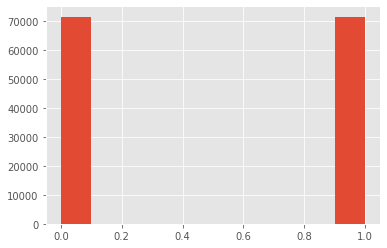

In [2]:
df = pd.read_pickle('ag-muon-data-tight.pkl')
X = np.array(df[3].to_list())
y = np.array(df[1].to_list())


num_ag = np.count_nonzero(y==0)
num_no_ag = np.count_nonzero(y==1)

df_majority = df[df[1]==0]
df_minority = df[df[1]==1]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=num_no_ag,     # to match minority class
                                 random_state=123) # reproducible results

df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_new = df_downsampled.sample(frac=1)

X = np.array(df_new[3].to_list())
y = np.array(df_new[1].to_list())
plt.hist(y)

### Initial network

Try re-running your NN from the previous exercise on this new data. **Note** the input vector now has length 1000, rather than 300. See how the network performs. Use the learning rate that you established in the last study.

In [3]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout, BatchNormalization
histories = []
#for lr in [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]:
for lr in [1e-3]:
    model5 = Sequential()
    model5.add(Dense(1000, input_dim=1000, activation='relu')) 
    model5.add(BatchNormalization())
    model5.add(Dense(1000, activation='relu'))
    model5.add(BatchNormalization())
    model5.add(Dense(128, activation='relu'))
    model5.add(BatchNormalization())
    model5.add(Dense(16, activation='relu'))
    model5.add(BatchNormalization())
    model5.add(Dense(1, activation='sigmoid'))
    ad = Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999, amsgrad=False)
    model5.compile(loss='binary_crossentropy', optimizer=ad, metrics=['accuracy'])
    history = model5.fit(X, y, epochs=30, batch_size=64, validation_split=0.2)
    histories.append(history)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 114219 samples, validate on 28555 samples
Epoch 1/30
114219/114219 [==============================] - 20s 174us/sample - loss: 0.2411 - acc: 0.8870 - val_loss: 3.4892 - val_acc: 0.5017
Epoch 2/30
114219/114219 [==============================] - 18s 156us/sample - loss: 0.1013 - acc: 0.9610 - val_loss: 0.7435 - val_acc: 0.7476
Epoch 3/30
114219/114219 [==============================] - 17s 145us/sample - loss: 0.0855 - acc: 0.9679 - val_loss: 1.8285 - val_acc: 0.6305
Epoch 4/30
114219/114219 [==============================] - 17s 146us/sample - loss: 0.0766 - acc: 0.9715 - val_loss: 0.6311 - val_acc: 0.7674
Epoch 5/30
114219/114219 [==============================] - 15s 135us/sample - loss: 0.0693 - acc: 0.9743 - val_loss: 0.1517 - val_acc: 0.9396
Epoch 6/30
114219/1142

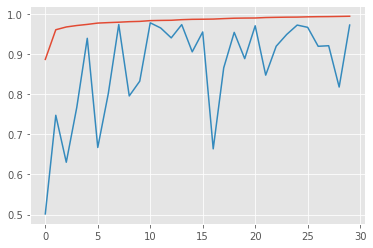

In [5]:
maxs = []
for h in histories:
    plt.plot(h.history['acc'])
    plt.plot(h.history['val_acc'])
    maxs.append(max(h.history['val_acc']))

### We're going to need a deeper network!

That looks pretty good! However, since we have so much more data now, we might be tempted to use deeper network with more paramters. Try a network with architecture

    INPUT - 1000 - 1000 - 128 - 16 - OUTPUT
    
For this architecture do the same test for learning rate effects, training for 30 epochs at each learning rate.

In [6]:
histories = []
for lr in [1e-3]:
    model5 = Sequential()
    model5.add(Dense(1000, input_dim=1000, activation='relu'))
    model5.add(BatchNormalization())
    model5.add(Dense(1000, activation='relu'))
    model5.add(BatchNormalization())
    model5.add(Dense(128, activation='relu'))
    model5.add(BatchNormalization())
    model5.add(Dense(16, activation='relu'))
    model5.add(BatchNormalization())
    model5.add(Dense(1, activation='sigmoid'))
    ad = Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999, amsgrad=False)
    model5.compile(loss='binary_crossentropy', optimizer=ad, metrics=['accuracy'])
    history = model5.fit(X, y, epochs=30, batch_size=64, validation_split=0.2)
    histories.append(history)

Train on 114219 samples, validate on 28555 samples
Epoch 1/30
114219/114219 [==============================] - 16s 143us/sample - loss: 0.2437 - acc: 0.8849 - val_loss: 0.1026 - val_acc: 0.9612
Epoch 2/30
114219/114219 [==============================] - 16s 136us/sample - loss: 0.1016 - acc: 0.9616 - val_loss: 0.1024 - val_acc: 0.9608
Epoch 3/30
114219/114219 [==============================] - 16s 141us/sample - loss: 0.0845 - acc: 0.9685 - val_loss: 0.4408 - val_acc: 0.8441
Epoch 4/30
114219/114219 [==============================] - 16s 139us/sample - loss: 0.0768 - acc: 0.9717 - val_loss: 0.3699 - val_acc: 0.8717
Epoch 5/30
114219/114219 [==============================] - 16s 138us/sample - loss: 0.0710 - acc: 0.9737 - val_loss: 1.7851 - val_acc: 0.6278
Epoch 6/30
114219/114219 [==============================] - 16s 138us/sample - loss: 0.0647 - acc: 0.9768 - val_loss: 0.2820 - val_acc: 0.9057
Epoch 7/30
114219/114219 [==============================] - 16s 138us/sample - loss: 0.0605

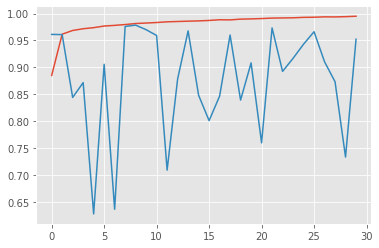

In [9]:
maxs = []
for h in histories:
    plt.plot(h.history['acc'])
    plt.plot(h.history['val_acc'])
    maxs.append(max(h.history['val_acc']))

In [12]:
histories[0].history['val_acc']

[0.9611977,
 0.96081245,
 0.8441254,
 0.8716512,
 0.627806,
 0.9056908,
 0.63645595,
 0.9759412,
 0.9784276,
 0.9699177,
 0.9592015,
 0.70915776,
 0.8782,
 0.96771145,
 0.8481877,
 0.8010506,
 0.8465067,
 0.960042,
 0.83922255,
 0.9082823,
 0.75976187,
 0.9732096,
 0.8925232,
 0.9167571,
 0.94302225,
 0.96617055,
 0.91038346,
 0.8732621,
 0.73335665,
 0.95223254]